## Module Import

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Data Load

우리가 사용할 데이터는 로이터 뉴스 데이터입니다. 이 데이터는 총 46개의 클래스로 구성되며, 해당 뉴스가 어느 카테고리에 속하는지를 예측하기 위한 데이터입니다. 텐서플로우 데이터셋에서 제공하고 있는 데이터로 아주 쉽게 다운로드가 가능합니다.

#### (1) 전체 단어

In [2]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = reuters.load_data(num_words=15000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


#### 데이터 확인

In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train_all)))
print('테스트 샘플의 수: {}'.format(len(x_test_all)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
# numn_words = None 조건 데이터 확인 
print(x_train_all[0])
print(x_test_all[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
# '레이블'을 나타냄
print(y_train_all[0])
print(y_test_all[0])

3
3


In [6]:
num_classes = max(y_train_all) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


#### 데이터 분포 확인해보기

뉴스 길이 분포

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


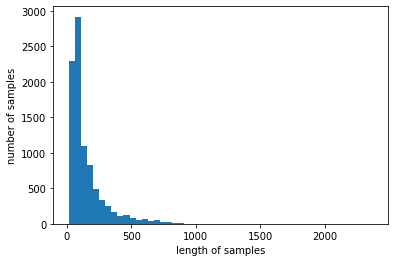

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train_all)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train_all))/len(x_train_all)))

plt.hist([len(s) for s in x_train_all], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

클래스 분포

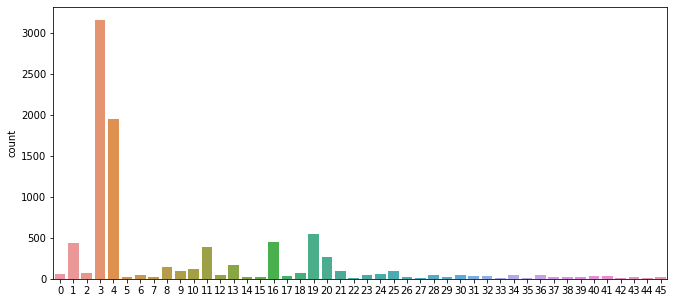

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_all)
plt.show()

3번, 4번 클래스 비율 높음

In [9]:
unique_elements, counts_elements = np.unique(y_train_all, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재합니다. 그 뒤로는 549개로 19번 클래스가 세 번째로 많고, 16번 클래스가 444개로 네 번째로 많네요. 이렇게 각 클래스가 몇 개가 존재하는지도 확인해 봤어요.

## 4-3. 로이터 뉴스 데이터 (2) 데이터 복원하기

#### 단어장 Load

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

557056/550378 [==============================] - 0s 0us/step


이게 이 데이터의 단어장(Vocabulary) 입니다. 이제 word_index 안에 단어를 입력하면 이 단어가 어떤 정수와 맵핑이 되는지를 알 수 있습니다. 단어 'the'는 어떤 정수와 맵핑이 될까요?

In [11]:
word_index['the']

1

In [12]:
word_index['it']

13

In [13]:
# "<pad>", "<sos>", "<unk>" 토큰을 위해 index에 "+3" 해주기
index_to_word = { index+3 : word for word, index in word_index.items() }

In [14]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [15]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [16]:
# index에 +3 을 해주어야하는 것 아님? X
# 'reuters' 데이터셋 내 Encoding된 것 자체가 원본이고
# reuters.get_word_index()를 통해 읽어온 word_index가 그것을 반영안하고 단어 순서로 index가 매겨져 있는 상태였음 
print(' '.join([index_to_word[index] for index in x_train_all[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [17]:
print(index_to_word[2])

<unk>


이제 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환해 보겠습니다.

In [18]:
decoded = []
for i in range(len(x_train_all)):
    t = ' '.join([index_to_word[index] for index in x_train_all[i]])
    decoded.append(t)

x_train_all = decoded
print(len(x_train_all))

8982


In [19]:
decoded = []
for i in range(len(x_test_all)):
    t = ' '.join([index_to_word[index] for index in x_test_all[i]])
    decoded.append(t)

x_test_all = decoded
print(len(x_test_all))

2246


각각 5개씩 출력해보고, 제대로 변환이 되었는지 확인해 보겠습니다.

In [20]:
x_train_all[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [21]:
x_test_all[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman <unk> yulo said yulo told reuters a survey during the current 

## 벡터화 하기

원활한 실습을 위해 아래의 도구들을 먼저 임포트 하겠습니다.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer # DTM
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
len(list(set(index_to_word.values())))

30982

In [24]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train_all)
print(x_train_dtm.shape) # 30982 -> 26506개로 감소 DTM의 자체적인 규칙이 무엇일까?

(8982, 14227)


TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성할 수 있습니다. TF-IDF Matrix는 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기를 가집니다.

In [25]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 14227)


## 1) 나이브 베이즈 분류기

#### 라이브러리 불러오기

먼저 앞으로 사용할 다양한 머신러닝 모델의 라이브러리를 불러오겠습니다.

In [282]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산 

나이브 베이즈 분류기는 사이킷런의 MultinomialNB()를 통해 사용할 수 있습니다.

사이킷런이 제공하는 머신러닝 모델들은 공통적으로 fit()이라는 함수를 제공하고 있는데요. 훈련 데이터와 해당 훈련 데이터에 대한 레이블을 인자로 사용하면 모델이 이를 학습합니다.

In [283]:
# cf) CSR 매트릭스 참고
from scipy.sparse import csr_matrix
indptr = np.array([0, 2, 3, 6])
indices = np.array([1, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csr_matrix((data, indices, indptr), shape=(3, 3)).toarray()

array([[0, 1, 2],
       [0, 0, 3],
       [4, 5, 6]])

In [284]:
# 나이브 베이즈 분류기 작동 방법 궁금
# Text 예시는 이해가 되었는데, CSR_Matrix로 표현되었을 때, 어떻게 계산되는지 궁금하다  
model = MultinomialNB()
model.fit(tfidfv, y_train_all)

MultinomialNB()

테스트 데이터에 대한 정확도를 측정하기 위해서는 훈련 데이터와 동일한 전처리를 거쳐야 합니다. 다시 말해 테스트 데이터도 TF-IDF 행렬로 변환해 주어야 합니다. 그 후 해당 행렬과 predict() 함수를 통해 예측값을 얻어 정확도를 측정합니다.

In [285]:
x_test_dtm = dtmvector.transform(x_test_all) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_all, predicted)) #예측값과 실제값 비교

정확도: 0.6331255565449688


In [286]:
x_test_all[3]

'<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

이 샘플의 레이블은 몇이었을까요?

In [287]:
y_test_all[3]

4

이 샘플의 레이블은 4네요. 과연 모델은 제대로 예측하고 있는지 그리고 어느 정도의 확신을 가지고 판단하는지 모델이 결정한 확률을 그래프로 시각화해봅시다.

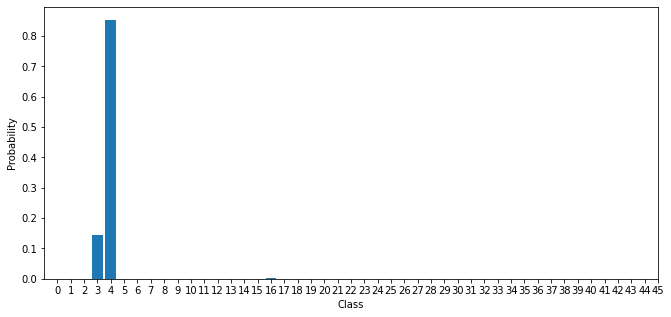

In [288]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [289]:
probability_3

array([1.90244970e-07, 1.94779315e-04, 5.01603931e-07, 1.42887235e-01,
       8.53486188e-01, 1.83751336e-08, 1.50741747e-07, 1.36018019e-08,
       6.69215782e-06, 1.01838740e-06, 2.41398554e-06, 1.13144746e-04,
       1.85584966e-07, 6.68817207e-06, 3.19808588e-08, 2.03595504e-08,
       2.82324193e-03, 2.05699046e-07, 4.02616886e-07, 4.01664678e-04,
       6.92118256e-05, 2.62308704e-06, 1.11856142e-08, 1.21944998e-07,
       2.51965066e-07, 1.76699877e-06, 3.59402170e-08, 1.32967294e-08,
       1.20424342e-07, 2.09427474e-08, 1.48363317e-07, 1.35747279e-07,
       5.96483314e-08, 7.94618441e-09, 1.47357718e-07, 6.13516606e-09,
       2.43312175e-07, 1.80515938e-08, 1.66118377e-08, 3.67571290e-08,
       9.48011250e-08, 6.34287810e-08, 9.67310011e-09, 2.57257756e-08,
       5.15985472e-09, 1.72074357e-08])

In [290]:
model.predict(tfidfv_test[3])

array([4])

모델은 4번 클래스를 약 76%의 확률로 확신하는데, 24%의 확률로 3번 클래스라고 판단합니다. 90%의 확률로 확신하므로 모델이 예측한 레이블은 4번입니다. 해당 샘플은 정확하게 예측했네요.

## 4-6. F1-Score, Confusion Matrix

#### 필요한 라이브러리 불러오기
먼저 이번 스텝에서 필요한 라이브러리를 불러오겠습니다.

In [291]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [292]:
print(classification_report(y_test_all, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.77      0.53      0.63       105
           2       0.00      0.00      0.00        20
           3       0.77      0.91      0.84       813
           4       0.47      0.96      0.63       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.04      0.08        25
          10       0.00      0.00      0.00        30
          11       0.69      0.40      0.50        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.41      0.53        99
          17       0.00    

최종 결과에서 각각이 의미하는 바는 다음과 같습니다.

- accuracy: 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율
- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 개수로 가중평균

아래의 함수를 통해서 혼동 행렬(confusion matrix)을 시각화할 수 있습니다

In [293]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

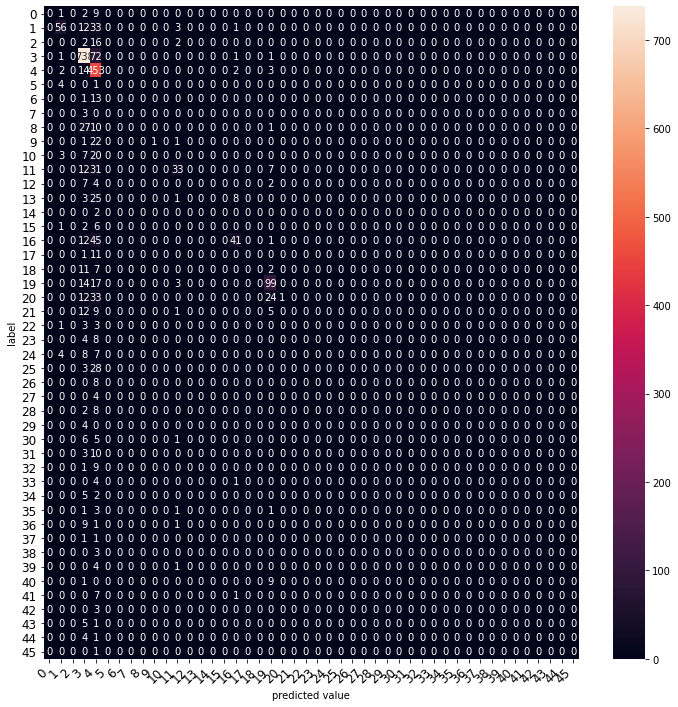

In [294]:
graph_confusion_matrix(model, tfidfv_test, y_test_all)

## ??? Complement Naive Bayes Classifier(CNB)

참고 : https://www.youtube.com/watch?v=Rhs3RIECfe4

In complement Naive Bayes, instead of calculating the probability of an item belonging to a certain class,
we calculate the probability of the item belonging to all the other classes.  

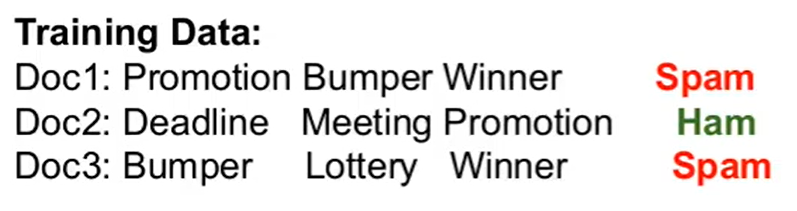

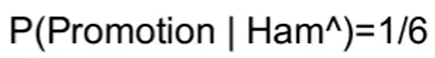
(total number of 'Promotion' not in Ham)/ (total number of words not in HAM)

!!! number of times Words occuring in all documents belonging to Compliment Classes / total number of words in Compliment classes 

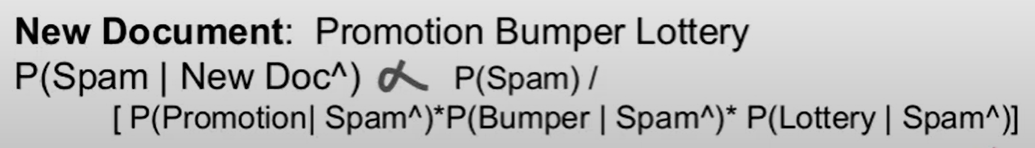

하지만 이대로 계산을 진행하게 되면, 0이 되는 경우가 많기 때문에 
분자(numerator)에 1을 더해주는 Smoothing을 거치게 된다.

sklearn.naive_bayes.ComplementNB()의 파라미터 Alpha의 값으로 Default로 1이 주어져 있다.

In [295]:
cb = ComplementNB()
cb.fit(tfidfv, y_train_all)

ComplementNB()

In [296]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_all, predicted)) #예측값과 실제값 비교

정확도: 0.7720391807658059


77%의 정확도를 얻었습니다. 기존 나이브 베이즈 분류기보다 10% 이상 높은 성능입니다.

#### 로지스틱 회귀(Logistic Regression)

사이킷런에서 소프트맥스 회귀는 LogisticRegression()을 통해서 구현할 수 있습니다.

In [297]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train_all)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [298]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_all, predicted)) #예측값과 실제값 비교

정확도: 0.8125556544968834


80%의 정확도를 얻었습니다. 지금까지의 모델 중 가장 높은 정확도를 얻었습니다.

## 선형 서포트 벡터 머신(Linear Support Vector Machine)

많은 선형 분류 모델은 태생적으로는 이진 분류만을 지원하는 이진 분류 모델입니다. (위에서 설명한 로지스틱 회귀는 예외입니다.) 서포트 벡터 머신의 구현체인 사이킷런의 LinearSVC 또한 태생적으로는 이진 분류를 위한 모델입니다. 그런데 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 사용하는 방법이 있습니다. 바로 일대다(one-vs.-rest 또는 one-vs.-all) 방법입니다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킵니다.

결국 클래스의 수만큼 이진 분류 모델이 만들어집니다. 예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택합니다. 서포트 벡터 머신을 사용하여 로이터 뉴스를 분류해 봅시다.

In [299]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train_all)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [300]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_all, predicted)) #예측값과 실제값 비교

정확도: 0.7845057880676759


CNB와 유사하게 77%의 정확도를 얻었습니다.

## 결정 트리(Decision Tree)

사이킷런에서는 DecisionTreeClassifier()를 사용해서 결정 트리를 구현할 수 있습니다. 결정 트리의 깊이는 max_depth라는 인자를 통해서 정해줄 수 있습니다.

In [301]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train_all)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [302]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_all, predicted)) #예측값과 실제값 비교

정확도: 0.6193232413178985


## 랜덤 포레스트(Random Forest)

앙상블(Ensemble)이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다. 뒤에서 보팅(Voting)이라는 앙상블 기법을 알아볼 텐데, 모델 자체가 앙상블을 사용하는 앙상블 모델들도 존재합니다. 랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델입니다.

랜덤포레스트는 'n_estimators'의 갯수만큼 작은 '트리'들을 가지고 있다. 
1. 부스팅은 중복된 데이터를 허용하고, 이때문에 모델의 편향성이 올라간다. (기본적인 모델인 Decision Tree모델의 경우, 데이터를 모두 사용한다. 반대로 Random Forest는 데이터의 일부를 취해서 사용을 하는데, 데이터를 중복해서 뽑은 샘플을 사용하는 경우도 있다.)
2. Random selection of feature set (기본적인 모델인 Decision Tree 모델의 경우, 가장 좋은 질문을 먼저 하지만, Random Forest 모델의 경우,질문이 Random하다.)
3. Aggregating of result (Voting)

랜덤 포레스트로 모델을 훈련시키고, 테스트 데이터에 대해서 정확도를 평가해 봅시다.

In [303]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train_all)

RandomForestClassifier(n_estimators=5, random_state=0)

In [304]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_all, predicted)) #예측값과 실제값 비교

정확도: 0.6714158504007124


#### 그래디언트 부스팅 트리(GradientBoostingClassifier)

그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델입니다. 그레디언트 부스팅은 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듭니다.

그래디언트 부스팅 트리는 일부 특성을 무시한다는 특징을 가지고 있습니다. 그래서 보통 랜덤 포레스트를 먼저 사용해보고, 성능이나 예측 시간 면에서 만족스럽지 않은 경우에 그래디언트 부스팅 트리를 시도해보는 것이 좋습니다.

일반적으로 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠릅니다.

정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델입니다. 다만, 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점이 있습니다.

현재 우리가 사용하는 TF-IDF 행렬은 희소하고 고차원 데이터지만, 결정 트리나 랜덤 포레스트보다 더 높은 성능을 얻을 수 있을지 한번 테스트해 볼까요?

저는 아래 코드 실행에 약 12분 정도 소요되었습니다. verbose=3을 GradientBoostingClassifier안에 인자로 넣어 진행 상황을 확인할 수 있으니 참고해 주세요!

In [305]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train_all)

GradientBoostingClassifier(random_state=0)

In [306]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_all, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


#### 보팅(Voting)

이전에 사용했던 세 가지 모델인 로지스틱 회귀, CNB, 그래디언트 부스팅 트리를 사용하여 소프트 보팅을 하였을 때의 성능을 비교해 봅시다.

In [307]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train_all)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [308]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test_all, predicted)) #예측값과 실제값 비교

정확도: 0.8165627782724845


#### RNN

In [26]:
(rnn_x_train, rnn_y_train), (rnn_x_test, rnn_y_test) = reuters.load_data(num_words=5000, test_split=0.2)
print(len(rnn_x_train), len(rnn_x_test))
max_len = max(len(l) for l in np.concatenate((rnn_x_train, rnn_x_test), axis=0))
print('max_len : ', max_len)

8982 2246
max_len :  2376


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
rnn_x_train = pad_sequences(rnn_x_train, maxlen=max_len)
rnn_x_test = pad_sequences(rnn_x_test, maxlen=max_len)

rnn_y_train = to_categorical(rnn_y_train, num_classes=46)
rnn_y_test = to_categorical(rnn_y_test, num_classes=46)

rnn_x_train = rnn_x_train[1000:]
rnn_y_train = rnn_y_train[1000:]
rnn_x_val = rnn_x_train[:1000]
rnn_y_val = rnn_y_train[:1000]

In [31]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

vocab_size = len(index_to_word)
print(vocab_size)
word_vector_dim = 120

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(keras.layers.LSTM(120))
model.add(keras.layers.Dense(46, activation='softmax'))
# 모델 훈련
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(rnn_x_train, rnn_y_train, epochs=50, callbacks=[es], batch_size=128, validation_data=(rnn_x_val, rnn_y_val), verbose=1)

30982
Epoch 1/50
63/63 [==============================] - 34s 490ms/step - loss: 0.4098 - accuracy: 0.0969 - val_loss: 0.0744 - val_accuracy: 0.3260
Epoch 2/50
63/63 [==============================] - 30s 480ms/step - loss: 0.0723 - accuracy: 0.3587 - val_loss: 0.0733 - val_accuracy: 0.3260
Epoch 3/50
63/63 [==============================] - 30s 480ms/step - loss: 0.0718 - accuracy: 0.3510 - val_loss: 0.0734 - val_accuracy: 0.3260
Epoch 4/50
63/63 [==============================] - 30s 482ms/step - loss: 0.0717 - accuracy: 0.3529 - val_loss: 0.0731 - val_accuracy: 0.3260
Epoch 5/50
63/63 [==============================] - 30s 482ms/step - loss: 0.0717 - accuracy: 0.3516 - val_loss: 0.0730 - val_accuracy: 0.3260
Epoch 6/50
63/63 [==============================] - 30s 479ms/step - loss: 0.0720 - accuracy: 0.3506 - val_loss: 0.0730 - val_accuracy: 0.3260
Epoch 7/50
63/63 [==============================] - 30s 482ms/step - loss: 0.0726 - accuracy: 0.3498 - val_loss: 0.0730 - val_accuracy: 

In [32]:
model.evaluate(rnn_x_test, rnn_y_test)

71/71 [==============================] - 8s 107ms/step - loss: 0.0720 - accuracy: 0.3620


[0.07195930182933807, 0.36197686195373535]

#### 회고록

로이터 데이터의 경우, 3번과 4번 클래스의 비율이 높은 편향된 데이터이다
때문에 Metric으로 Accuracy가 별로 적합하지 않다
왜냐하면, 학습시킨 모델이 아니라, 3번과 4번 클래스로만 예측하는 모델을 만들면 그 결과가 더 좋을 수 있기 때문이다. 따라서 조화 평균을 사용한 F1 Score로 평가를 진행했어야하지만 이미 Accuracy로 학습을 진행하여, 
학습 진행 시간을 고려하여 부득이하게 Accuracy데이터로 제출을 하게 되었다. 

다음 표는 Vocab의 단위를 바꿔가며, 모델별 성능을 평가한 결과이다

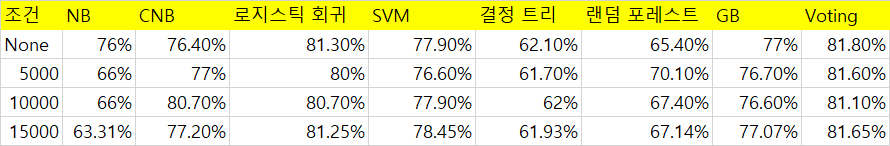